**Author**: Lukas Hörtnagl (holukas@ethz.ch)

# **Imports**

In [1]:
import importlib.metadata
import warnings
from datetime import datetime
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from diive.core.io.files import save_parquet, load_parquet
from diive.core.plotting.cumulative import CumulativeYear
from diive.core.plotting.heatmap_datetime import HeatmapDateTime, HeatmapYearMonth

warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)
version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")

diive version: v0.85.5


# **Load data**

In [2]:
SOURCEDIR = r"../60_MERGE_DATA_FLUXES"
FILENAME = r"61.1_FLUXES_M10_MGMT_L4.1_NEE_LE_H_FN2O_FCH4.parquet"
FILEPATH = Path(SOURCEDIR) / FILENAME
df = load_parquet(filepath=FILEPATH)
df

Loaded .parquet file ..\60_MERGE_DATA_FLUXES\61.1_FLUXES_M10_MGMT_L4.1_NEE_LE_H_FN2O_FCH4.parquet (0.862 seconds).
    --> Detected time resolution of <30 * Minutes> / 30min 


,.PREC_RAIN_TOT_GF1_0.5_1_MEAN3H-12,.PREC_RAIN_TOT_GF1_0.5_1_MEAN3H-18,.PREC_RAIN_TOT_GF1_0.5_1_MEAN3H-24,.PREC_RAIN_TOT_GF1_0.5_1_MEAN3H-6,.SWC_GF1_0.15_1_gfXG_MEAN3H-12,.SWC_GF1_0.15_1_gfXG_MEAN3H-18,.SWC_GF1_0.15_1_gfXG_MEAN3H-24,.SWC_GF1_0.15_1_gfXG_MEAN3H-6,.TS_GF1_0.04_1_gfXG_MEAN3H-12,.TS_GF1_0.04_1_gfXG_MEAN3H-18,.TS_GF1_0.04_1_gfXG_MEAN3H-24,.TS_GF1_0.04_1_gfXG_MEAN3H-6,.TS_GF1_0.15_1_gfXG_MEAN3H-12,.TS_GF1_0.15_1_gfXG_MEAN3H-18,.TS_GF1_0.15_1_gfXG_MEAN3H-24,...,FCH4_L3.1_L3.3_CUT_50_QCF,FCH4_L3.1_L3.3_CUT_50_QCF0,FLAG_L3.3_CUT_84_FCH4_L3.1_USTAR_TEST,SUM_L3.3_CUT_84_FCH4_L3.1_HARDFLAGS,SUM_L3.3_CUT_84_FCH4_L3.1_SOFTFLAGS,SUM_L3.3_CUT_84_FCH4_L3.1_FLAGS,FLAG_L3.3_CUT_84_FCH4_L3.1_QCF,FCH4_L3.1_L3.3_CUT_84_QCF,FCH4_L3.1_L3.3_CUT_84_QCF0,FCH4_L3.1_L3.3_CUT_16_QCF_gfRF,FLAG_FCH4_L3.1_L3.3_CUT_16_QCF_gfRF_ISFILLED,FCH4_L3.1_L3.3_CUT_50_QCF_gfRF,FLAG_FCH4_L3.1_L3.3_CUT_50_QCF_gfRF_ISFILLED,FCH4_L3.1_L3.3_CUT_84_QCF_gfRF,FLAG_FCH4_L3.1_L3.3_CUT_84_QCF_gfRF_ISFILLED
TIMESTAMP_MIDDLE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 01:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 01:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 02:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 21:45:00,0.0,0.0,0.0,0.0,52.229004,52.226300,52.226689,52.216796,3.458828,3.150402,3.115260,3.660897,4.335667,4.347764,4.385967,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-31 22:15:00,0.0,0.0,0.0,0.0,52.227858,52.227986,52.224528,52.214211,3.522570,3.187638,3.103440,3.643396,4.338551,4.342880,4.379524,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-31 22:45:00,0.0,0.0,0.0,0.0,52.226640,52.229837,52.222456,52.209876,3.578745,3.230037,3.095339,3.624025,4.343767,4.339440,4.372636,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **List of air temperature variables**

In [3]:
fluxlist = [c for c in df.columns if "TA" in c];
fluxlist

['AXES_ROTATION_METHOD',
 'CUSTOM_DATA_SIZE_IRGA75_MEAN',
 'CUSTOM_DATA_SIZE_LGR_MEAN',
 'CUSTOM_DATA_SIZE_QCL_MEAN',
 'CUSTOM_STATUS_CODE_IRGA75_MEAN',
 'CUSTOM_STATUS_CODE_LGR_MEAN',
 'CUSTOM_STATUS_CODE_QCL_MEAN',
 'CUSTOM_STATUS_QCL_MEAN',
 'CUSTOM_STATUS_WORD_QCL_MEAN',
 'DENTRENDING_TIME_CONSTANT',
 'DOY_START',
 'ET_STAGE1',
 'ET_STAGE2',
 'FCH4_STAGE1',
 'FCH4_STAGE2',
 'FC_STAGE1',
 'FC_STAGE2',
 'FH2O_STAGE1',
 'FH2O_STAGE2',
 'FLAG_TA_T1_2_1_ISFILLED',
 'FN2O_STAGE1',
 'FN2O_STAGE2',
 'H_STAGE1',
 'H_STAGE2',
 'LE_STAGE1',
 'LE_STAGE2',
 'TAU',
 'TAU_CORRDIFF',
 'TAU_NR',
 'TAU_NSR',
 'TAU_RANDUNC_HF',
 'TAU_SCF',
 'TAU_SS',
 'TAU_SSITC_TEST',
 'TAU_SS_TEST',
 'TAU_STAGE1',
 'TAU_STAGE2',
 'TAU_UNCORR',
 'TA_EP',
 'TA_T1_2_1',
 'TIMESTAMP_START',
 'TSTAR',
 'USTAR',
 'USTAR_UNCORR',
 'FLAG_L3.3_CUT_16_NEE_L3.1_USTAR_TEST',
 'FLAG_L3.3_CUT_50_NEE_L3.1_USTAR_TEST',
 'FLAG_L3.3_CUT_84_NEE_L3.1_USTAR_TEST',
 'FLAG_L3.3_CUT_NONE_LE_L3.1_USTAR_TEST',
 'FLAG_L3.3_CUT_NONE_H_L3.1_US

# **Air temperature**

## Heatmaps (half-hourly)

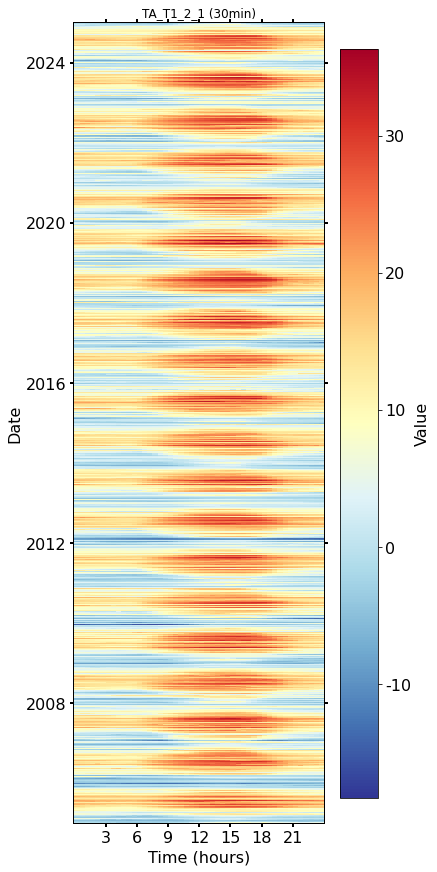

In [20]:
fig, axs = plt.subplots(ncols=1, figsize=(6, 12), dpi=72, layout="constrained")
HeatmapDateTime(series=df['TA_T1_2_1'], ax=axs, cb_digits_after_comma=0).plot()

## Heatmaps (monthly)

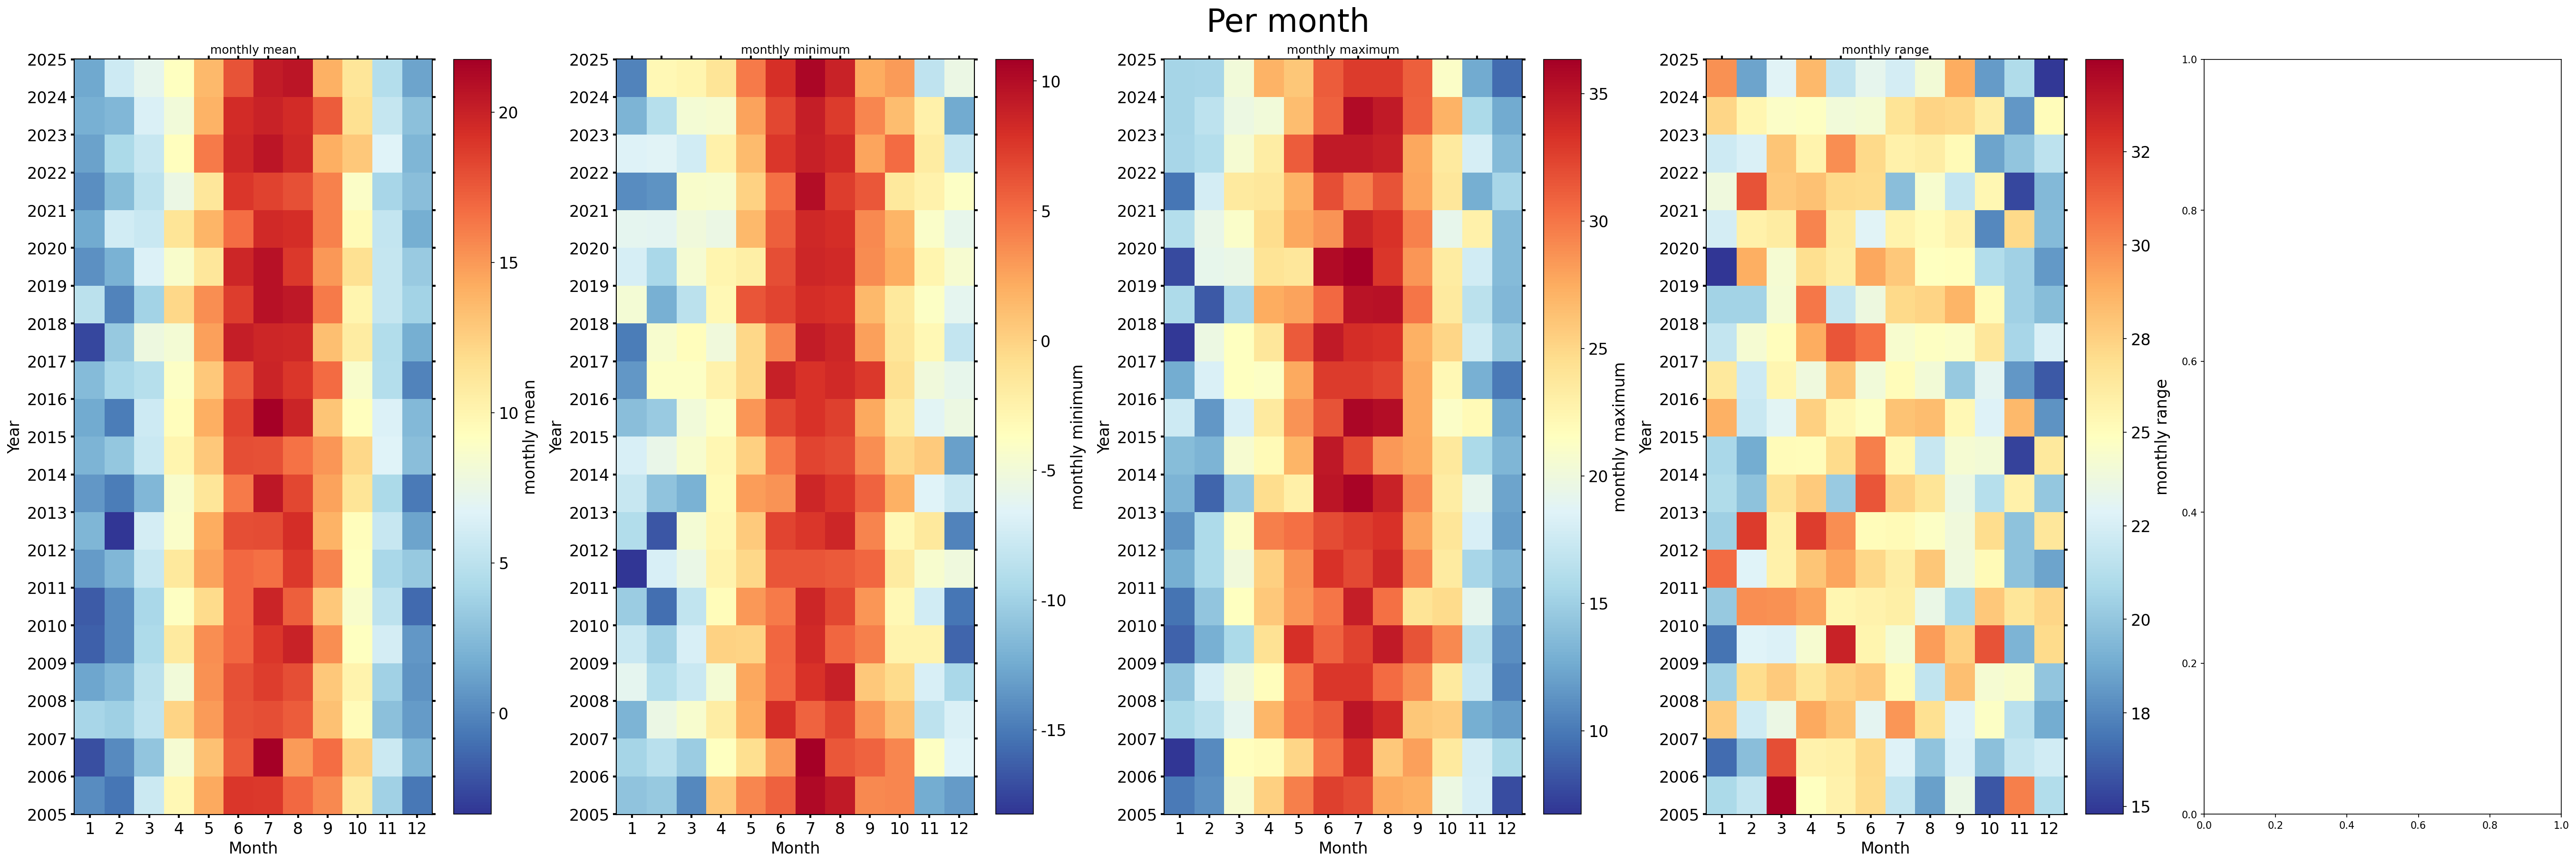

In [125]:
fig, axs = plt.subplots(ncols=5, figsize=(36, 12), dpi=150, layout="constrained")
fig.suptitle(f'Per month', fontsize=32)


s = df['TA_T1_2_1'].resample('M').mean()        
HeatmapYearMonth(series_monthly=s, title="monthly mean", ax=axs[0], cb_digits_after_comma=0, zlabel="monthly mean").plot()
s = df['TA_T1_2_1'].resample('M').min()        
HeatmapYearMonth(series_monthly=s, title="monthly minimum", ax=axs[1], cb_digits_after_comma=0, zlabel="monthly minimum").plot()
s = df['TA_T1_2_1'].resample('M').max()        
HeatmapYearMonth(series_monthly=s, title="monthly maximum", ax=axs[2], cb_digits_after_comma=0, zlabel="monthly maximum").plot()
s = df['TA_T1_2_1'].resample('M').max().sub(df['TA_T1_2_1'].resample('M').min())      
HeatmapYearMonth(series_monthly=s, title="monthly range", ax=axs[3], cb_digits_after_comma=0, zlabel="monthly range").plot()

# axs[0].axes.get_yaxis().get_label().set_visible(False)
# hide_labels = [1, 2, 3, 4]
# for h in hide_labels:
#     axs[h].axes.get_yaxis().get_label().set_visible(False)
#     plt.setp(axs[h].get_yticklabels(), visible=False)

## Averages up to respective DOY

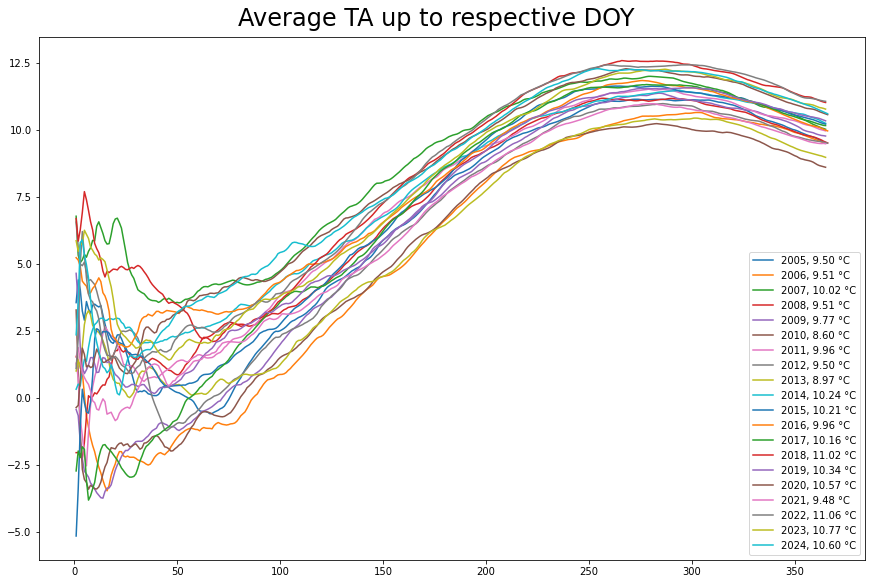

In [86]:
ta = "TA_T1_2_1"
plotdf = df[[ta]].copy()
plotdf = plotdf.resample('D').mean()
plotdf['DOY'] = plotdf.index.date
plotdf['DOY'] = pd.to_datetime(plotdf['DOY']).dt.dayofyear

allyears = pd.DataFrame()
counter = 0
for year in range (2005, 2025, 1):
    counter += 1
    locs = plotdf.index.year == year
    yeardf = plotdf[locs].copy()
    yeardf['CUMSUM'] = yeardf[ta].cumsum()  
    yeardf['avg'] = yeardf['CUMSUM'].divide(yeardf['DOY'])
    if counter == 1:
        allyears = yeardf.copy()
    else:
        allyears = pd.concat([allyears, yeardf], axis=0)

fig, ax = plt.subplots(ncols=1, figsize=(12, 8), dpi=72, layout="constrained")
fig.suptitle("Average TA up to respective DOY", fontsize=24)

grouped = allyears.groupby(allyears.index.year)
for ix, groupdf in grouped:
    yearlyavg = groupdf["avg"].iloc[-1]
    ax.plot(groupdf["DOY"], groupdf["avg"], label=f"{ix}, {yearlyavg:.2f} °C")
    # groupdf.plot()
    # print(groupdf)
ax.legend();

## Number of days below 0°C

,TA_T1_2_1,YEAR
TIMESTAMP_MIDDLE,,
2005,94,2005
2006,107,2006
2007,100,2007
2008,112,2008
2009,107,2009
2010,118,2010
2011,98,2011
2012,100,2012
2013,113,2013


Average per year: 97.9 +/- 10.57 SD


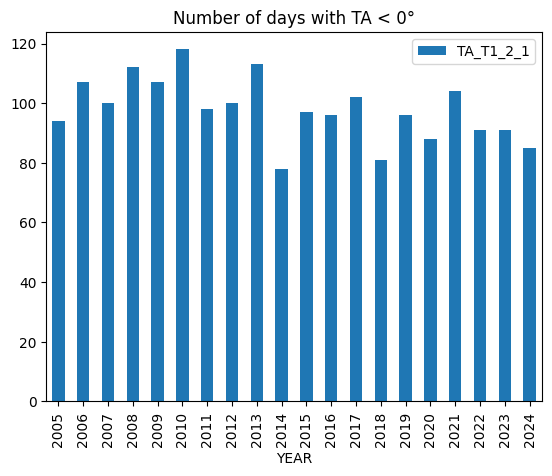

In [112]:
ta = "TA_T1_2_1"
plotdf = df[[ta]].copy()
plotdf = plotdf.resample('D').min()
belowzero = plotdf.loc[plotdf[ta] < 0].copy()
belowzero = belowzero.groupby(belowzero.index.year).count()
belowzero["YEAR"] = belowzero.index
belowzero
belowzero.plot.bar(x="YEAR", y=ta, title="Number of days with TA < 0°");
display(belowzero)
print(f"Average per year: {belowzero[ta].mean()} +/- {belowzero[ta].std():.2f} SD")

## Number of days above 30°C

,TA_T1_2_1,YEAR
TIMESTAMP_MIDDLE,,
2005,8,2005
2006,17,2006
2007,9,2007
2008,12,2008
2009,18,2009
2010,14,2010
2011,10,2011
2012,13,2012
2013,14,2013


Average per year: 16.45 +/- 6.89 SD


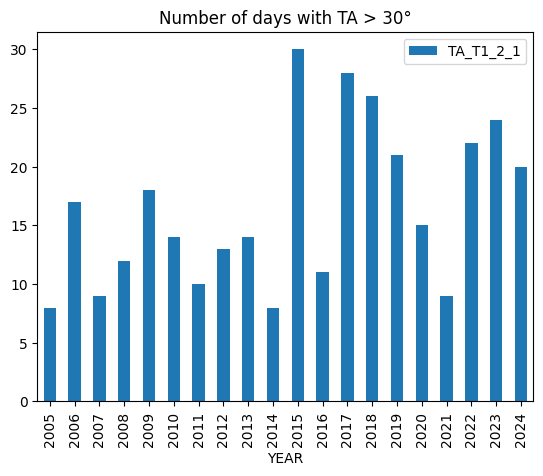

In [123]:
ta = "TA_T1_2_1"
plotdf = df[[ta]].copy()
plotdf = plotdf.resample('D').max()
above = plotdf.loc[plotdf[ta] > 30].copy()
above = above.groupby(above.index.year).count()
above["YEAR"] = above.index
above.plot.bar(x="YEAR", y=ta, title="Number of days with TA > 30°");
display(above)
print(f"Average per year: {above[ta].mean()} +/- {above[ta].std():.2f} SD")

# **End of notebook**

In [ ]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished. {dt_string}")